In [1]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
test_result = pd.read_csv('9-2-1-logistic-regression.csv')
test_result.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


<AxesSubplot:xlabel='hours', ylabel='result'>

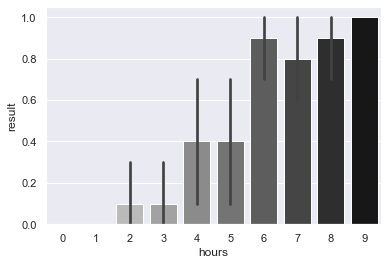

In [3]:
sns.barplot(x='hours', y='result', data=test_result, palette='gray_r')

In [4]:
test_result.groupby('hours').mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


In [5]:
mod_glm = smf.glm(formula='result ~ hours', data=test_result, family=sm.families.Binomial()).fit()

In [6]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Mon, 22 May 2023   Deviance:                       68.028
Time:                        19:56:47   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [7]:
mod_glm_null = smf.glm('result ~ 1', data=test_result, family=sm.families.Binomial()).fit()

In [8]:
print('Nullモデル：', round(mod_glm_null.aic, 3))
print('変数入りモデル：', round(mod_glm.aic, 3))

Nullモデル： 139.989
変数入りモデル： 72.028


In [9]:
exp_val = pd.DataFrame({'hours': np.arange(0, 10, 1)})

pred = mod_glm.predict(exp_val)
pred

0    0.010
1    0.026
2    0.063
3    0.145
4    0.301
5    0.521
6    0.734
7    0.875
8    0.946
9    0.978
dtype: float64

In [10]:
beta0 = mod_glm.params[0]
beta1 = mod_glm.params[1]
hour = 9

round(1 / (1 + np.exp(-(beta0 + beta1 * hour))), 3)

0.978

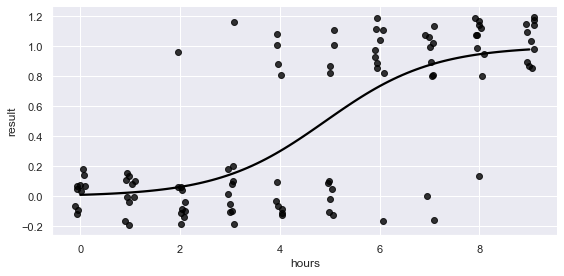

In [11]:
sns.lmplot(x='hours', y='result', data=test_result, logistic=True, scatter_kws={'color': 'black'},
           line_kws={'color': 'black'}, x_jitter=0.1, y_jitter=0.2, ci=None, height=4, aspect=2)

In [12]:
exp_val_1 = pd.DataFrame({'hours': [1]})
pred_1 = mod_glm.predict(exp_val_1)

exp_val_2 = pd.DataFrame({'hours': [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [13]:
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

log_odds_ratio = np.log(odds_2 / odds_1)
log_odds_ratio

0    0.929
dtype: float64

In [14]:
round(mod_glm.params['hours'], 3)

0.929

In [15]:
round(np.exp(mod_glm.params['hours']), 3)

2.532

In [16]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [17]:
test_result = pd.read_csv('9-2-1-logistic-regression.csv')

mod_glm = smf.glm(formula='result ~ hours', data=test_result, family=sm.families.Binomial()).fit()

In [18]:
pred = mod_glm.predict()

y = test_result.result

peason_resid = (y - pred) / np.sqrt(pred * (1 - pred))
peason_resid.head()

0   -0.102
1   -0.102
2   -0.102
3   -0.102
4   -0.102
Name: result, dtype: float64

In [19]:
mod_glm.resid_pearson.head()

0   -0.102
1   -0.102
2   -0.102
3   -0.102
4   -0.102
dtype: float64

In [20]:
round(np.sum(mod_glm.resid_pearson**2), 3)

84.911

In [21]:
round(mod_glm.pearson_chi2, 3)

84.911

In [22]:
pred = mod_glm.predict()

y = test_result.result

resid_tmp = 0 - np.log(stats.binom.pmf(k = y, n = 1, p = pred))

deviance_resid = np.sqrt(2 * resid_tmp) * np.sign(y - pred)

deviance_resid.head()

0   -0.144
1   -0.144
2   -0.144
3   -0.144
4   -0.144
Name: result, dtype: float64

In [23]:
mod_glm.resid_deviance.head()

0   -0.144
1   -0.144
2   -0.144
3   -0.144
4   -0.144
dtype: float64

In [24]:
deviance = np.sum(mod_glm.resid_deviance ** 2)
round(deviance, 3)

68.028

In [25]:
loglik = sum(np.log(stats.binom.pmf(k=y, n=1, p=pred)))
round(loglik, 3)

-34.014

In [26]:
round(mod_glm.llf, 3)

-34.014

In [27]:
round(2 * (0 - mod_glm.llf), 3)

68.028

In [28]:
round(mod_glm.deviance, 3)

68.028

In [29]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [30]:
round(stats.poisson.pmf(k=1, mu=2), 3)

0.271

In [31]:
np.random.seed(1)
stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

<AxesSubplot:>

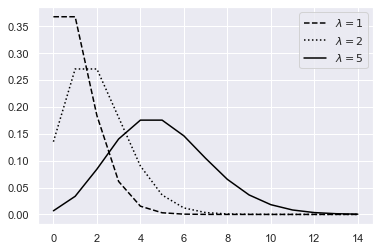

In [33]:
x = np.arange(0, 15, 1)
poisson_lambda1 = stats.poisson.pmf(mu=1, k=x)
poisson_lambda2 = stats.poisson.pmf(mu=2, k=x)
poisson_lambda5 = stats.poisson.pmf(mu=5, k=x)

sns.lineplot(x=x, y=poisson_lambda1, color='black', linestyle='dashed', label='$\lambda=1$')
sns.lineplot(x=x, y=poisson_lambda2, color='black', linestyle='dotted', label='$\lambda=2$')
sns.lineplot(x=x, y=poisson_lambda5, color='black', linestyle='solid', label='$\lambda=5$')

<AxesSubplot:>

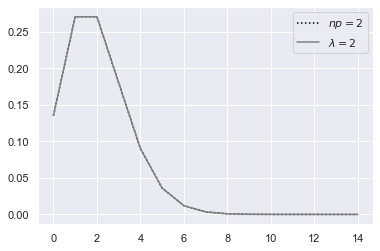

In [35]:
p = 0.0000002
n = 10000000
binomial = stats.binom.pmf(n=n, p=p, k=x)

sns.lineplot(x=x, y=binomial, color='black', linestyle='dotted', label='$np=2$')
sns.lineplot(x=x, y=poisson_lambda2, color='gray', linestyle='solid', label='$\lambda=2$')

In [36]:
beer = pd.read_csv('9-4-1-poisson-regression.csv')
beer.head()

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0
3,4,14.1
4,2,9.4


In [38]:
mod_pois = smf.glm('beer_number ~ temperature', beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Mon, 22 May 2023   Deviance:                       5.1373
Time:                        20:16:59   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [39]:
mod_pois_null = smf.glm('beer_number ~ 1', data=beer, family=sm.families.Poisson()).fit()

In [40]:
print('Nullモデル：', round(mod_pois_null.aic, 3))
print('変数入りモデル：', round(mod_pois.aic, 3))

Nullモデル： 223.363
変数入りモデル： 119.343


In [41]:
exp_val_20 = pd.DataFrame({'temperature': [20]})
mod_pois.predict(exp_val_20)

0    7.164
dtype: float64

In [42]:
beta0 = mod_pois.params[0]
beta1 = mod_pois.params[1]
temperature = 20

round(np.exp(beta0 + beta1 * temperature), 3)

7.164

<AxesSubplot:xlabel='temperature', ylabel='beer_number'>

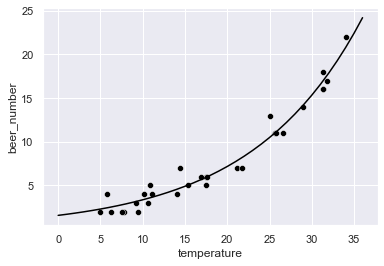

In [43]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(pd.DataFrame({'temperature': x_plot}))

sns.scatterplot(x='temperature', y='beer_number', data=beer, color='black')

sns.lineplot(x=x_plot, y=pred, color='black')

In [44]:
exp_val_1 = pd.DataFrame({'temperature': [1]})
pred_1 = mod_pois.predict(exp_val_1)

exp_val_2 = pd.DataFrame({'temperature': [2]})
pred_2 = mod_pois.predict(exp_val_2)

round(pred_2 / pred_1, 3)

0    1.079
dtype: float64

In [45]:
round(np.exp(mod_pois.params['temperature']), 3)

1.079